###  <center><b>Sales Forecasting using ARIMA</b></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\dell\Downloads\Sales_Forecasting.csv")

In [3]:
df.head(5)

,Date,Sales
0,1992-01-31,3352.81
1,1992-02-29,3080.03
2,1992-03-31,3195.75
3,1992-04-30,3448.18
4,1992-05-31,3373.51


In [5]:
df.tail(5)

,Date,Sales
145,2004-02-29,3188.90
146,2004-03-31,2817.44
147,2004-04-30,3223.40
148,2004-05-31,2736.82
149,2004-06-30,2907.68


In [4]:
df.shape

(150, 2)

In [146]:
df['Date'] = pd.to_datetime(df['Date'])

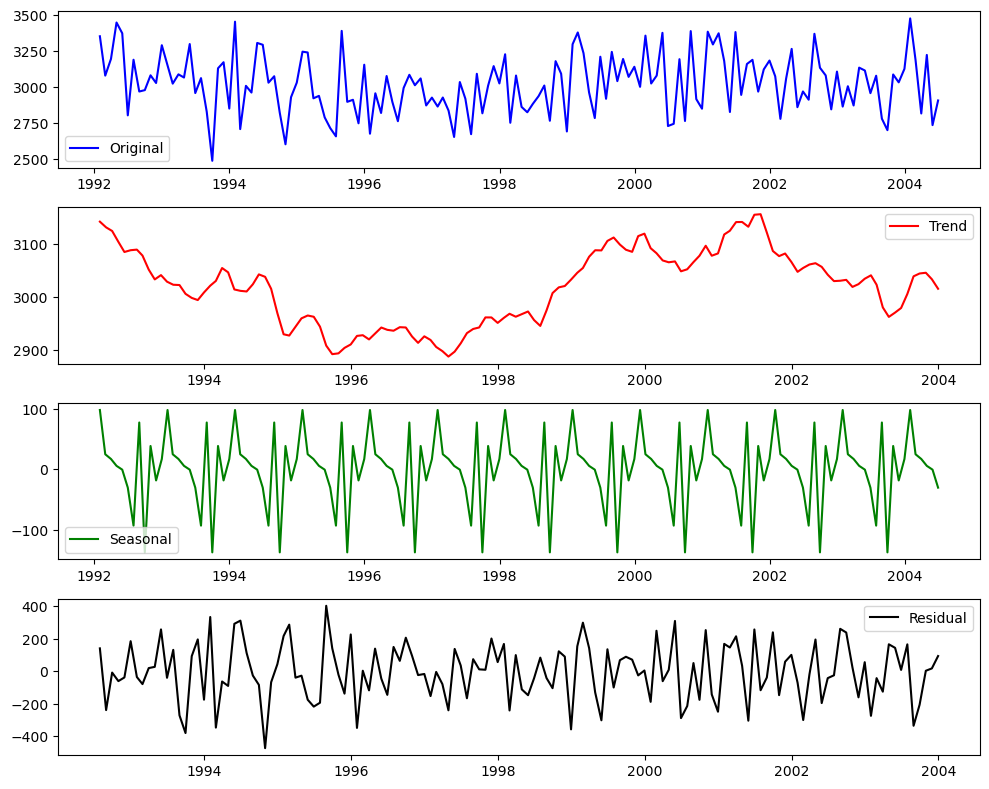

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)  # Assuming a yearly seasonality (12 months)

# Visualize the seasonal decomposition plot
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['Date'], df['Sales'], label='Original', color='b')
plt.legend()
plt.subplot(412)
plt.plot(df['Date'], decomposition.trend, label='Trend', color='r')
plt.legend()
plt.subplot(413)
plt.plot(df['Date'], decomposition.seasonal, label='Seasonal', color='g')
plt.legend()
plt.subplot(414)
plt.plot(df['Date'], decomposition.resid, label='Residual', color='k')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_26420\1150359609.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sales'], color='green', shade=True)


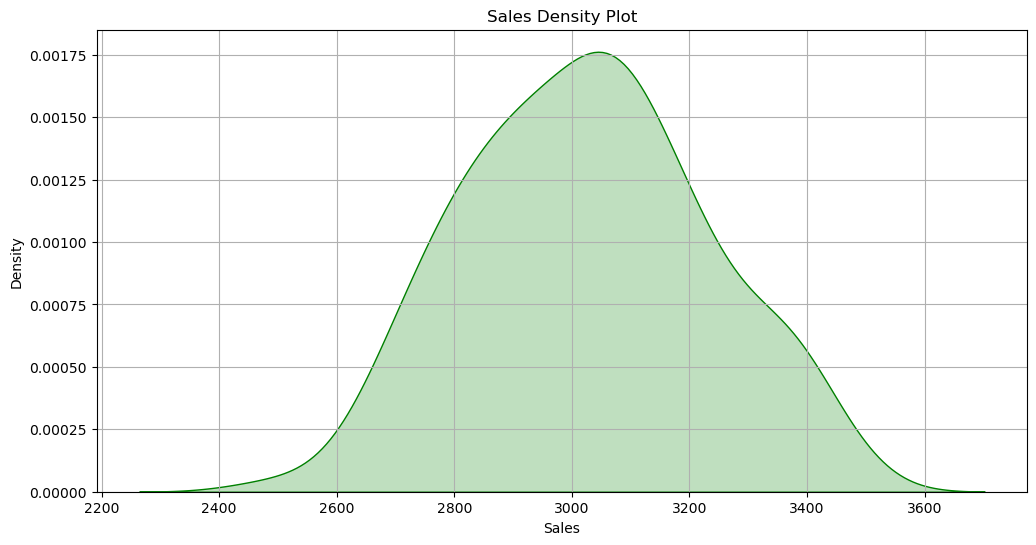

In [149]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Sales'], color='green', shade=True)
plt.title("Sales Density Plot")
plt.xlabel("Sales")
plt.ylabel("Density")
plt.grid(True)
plt.show()



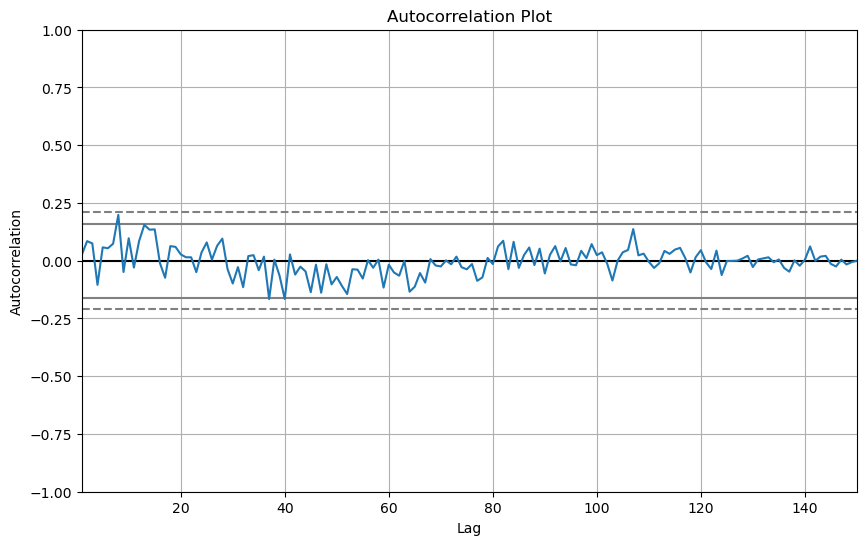

In [150]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Sales'])
plt.title("Autocorrelation Plot")
plt.grid(True)
plt.show()


In [151]:
df.set_index('Date', inplace=True)

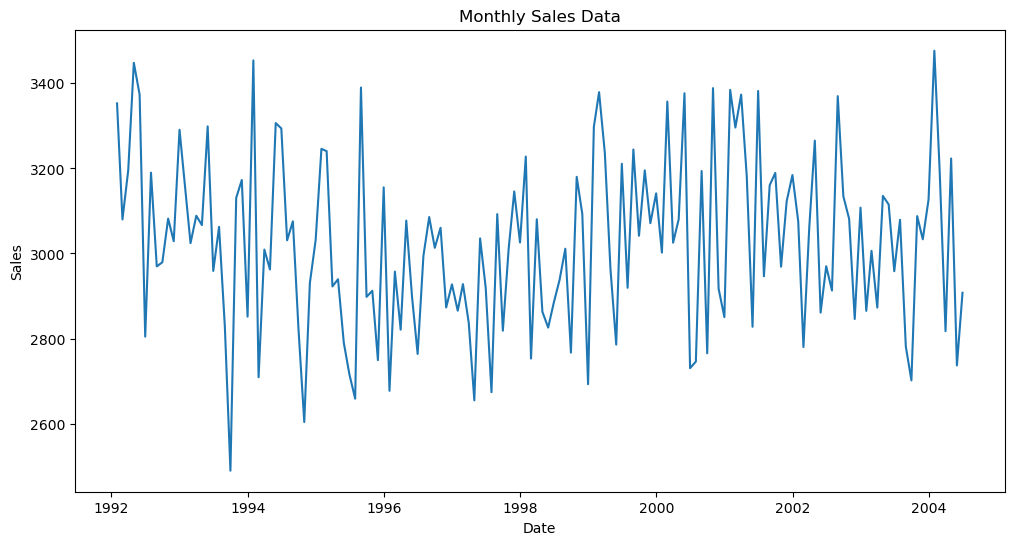

In [152]:
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'])
plt.title("Monthly Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [153]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")

adf_test(df['Sales'])

ADF Statistic: -11.892008815984594
p-value: 5.838773456071269e-22
Critical Values:
1%: -3.4750180242954167
5%: -2.8811408028842043
10%: -2.577221358046935


<Figure size 1200x600 with 0 Axes>

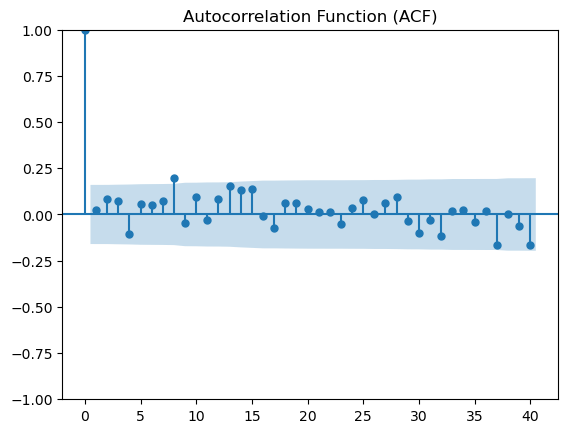

In [154]:
plt.figure(figsize=(12, 6))
plot_acf(df['Sales'], lags=40)
plt.title("Autocorrelation Function (ACF)")
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

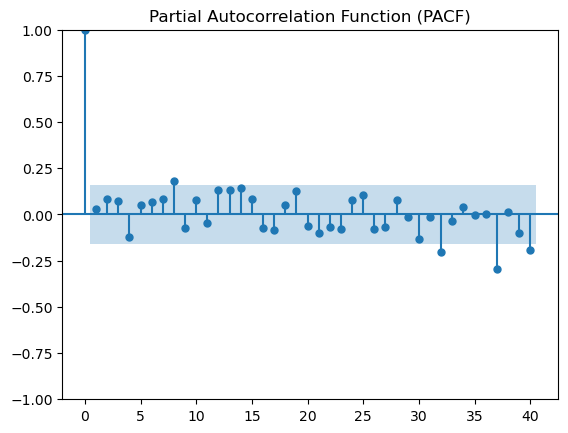

In [155]:
plt.figure(figsize=(12, 6))
plot_pacf(df['Sales'], lags=40)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [156]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [157]:
train_size

120

In [158]:
test_data

,Sales
Date,
2002-01-31,3075.29
2002-02-28,2780.12
2002-03-31,3059.65
2002-04-30,3265.28
2002-05-31,2861.09
2002-06-30,2970.07
2002-07-31,2912.97
2002-08-31,3369.85
2002-09-30,3134.46


In [159]:
p, d, q = 8, 1, 8
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_

In [160]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  120
Model:                 ARIMA(8, 1, 8)   Log Likelihood                -790.972
Date:                Tue, 31 Oct 2023   AIC                           1615.943
Time:                        22:21:07   BIC                           1663.188
Sample:                    01-31-1992   HQIC                          1635.128
                         - 12-31-2001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7917      0.150     -5.273      0.000      -1.086      -0.497
ar.L2         -0.3710      0.195     -1.903      0.057      -0.753       0.011
ar.L3         -0.1882      0.196     -0.960      0.337      -0.572       0.196
ar.L4         -0.0579      0.179     -0.323      0.747      -0.410       0.294
ar.L5          0.0213      0.185      0.116      0.908      -0.340       0.383
ar.L6          0.4458      0.222      2.004      0.045       0.010       0.882
ar.L7          0.6215      0.199      3.119      0.002       0.231       1.012
ar.L8          0.1277      0.146      0.876      0.381      -0.158       0.413
ma.L1         -0.2221      0.210     -1.058      0.290      -0.633       0.189
ma.L2         -0.3183      0.221     -1.442      0.149      -0.751       0.114
ma.L3         -0.0934      0.356     -0.262      0.793      -0.791       0.605
ma.L4         -0.3250      0.123     -2.640      0.008      -0.566      -0.084
ma.L5         -0.0997      0.320     -0.312      0.755      -0.727       0.527
ma.L6         -0.4164      0.327     -1.275      0.202      -1.057       0.224
ma.L7         -0.2076      0.162     -1.283      0.200      -0.525       0.110
ma.L8          0.8738      0.268      3.255      0.001       0.348       1.400
sigma2      3.451e+04   1.09e+04      3.152      0.002     1.3e+04     5.6e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.97   Prob(JB):                         0.83
Heteroskedasticity (H):               1.16   Skew:                            -0.02
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
predictions = model_fit.forecast(steps=len(test_data))

In [162]:
predictions

2002-01-31    2913.267650
2002-02-28    3219.465404
2002-03-31    3135.774216
2002-04-30    3157.883834
2002-05-31    3172.570638
2002-06-30    3014.166362
2002-07-31    2982.708905
2002-08-31    3157.393092
2002-09-30    3178.558245
2002-10-31    3109.341417
2002-11-30    3131.459308
2002-12-31    3066.196443
2003-01-31    3014.594308
2003-02-28    3118.051428
2003-03-31    3178.792187
2003-04-30    3110.885623
2003-05-31    3093.785878
2003-06-30    3089.809792
2003-07-31    3050.032513
2003-08-31    3097.161312
2003-09-30    3159.680017
2003-10-31    3120.737570
2003-11-30    3079.654894
2003-12-31    3090.215066
2004-01-31    3079.423327
2004-02-29    3091.149879
2004-03-31    3137.510069
2004-04-30    3124.510757
2004-05-31    3081.713721
2004-06-30    3084.988886
Freq: M, Name: predicted_mean, dtype: float64

In [163]:
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE on Test Data: {rmse}')

RMSE on Test Data: 213.1552067676215


In [164]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE on the test data
mape = mean_absolute_percentage_error(test_data['Sales'], predictions)
print(f'MAPE on Test Data: {mape:.2f}%')


MAPE on Test Data: 5.59%


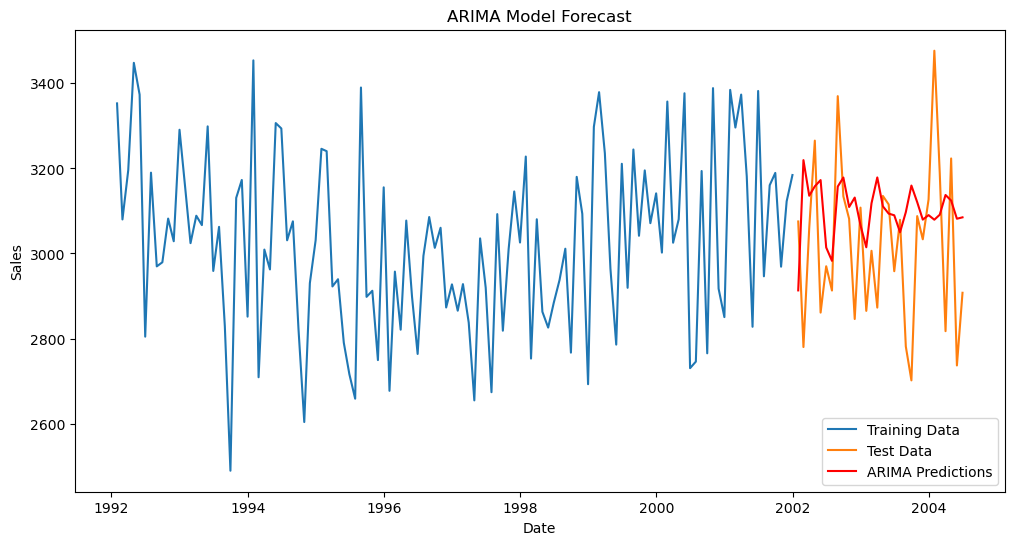

In [165]:
import matplotlib.pyplot as plt

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(predictions, label='ARIMA Predictions', color='red')
plt.title("ARIMA Model Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

